In [10]:
def constraints():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        x[i] = solver.IntVar(0, 1, '')

    # Constraints
    # extreme rows and columns are empty
    """for i in range(number_seats):
        if i % seating_rows == 0 or i % seating_rows == seating_rows - 1:
            solver.Add(x[i] == 0)
    
    for j in range(number_seats):
        if j < seating_columns or j > number_seats - seating_columns:
            solver.Add(x[j] == 0)"""
    
    #distance constraint
    for a, b in combinations(range(number_seats), 2):
        if (x_seats[a] - x_seats[b])**2 + (y_seats[a] - y_seats[b])**2 < 2 ** 2:
            solver.Add(solver.Sum([ x[a] , x[b] ]) <= 1 )
    
    
    # Objective
    objective_terms = []
    for i in range(number_seats):
        objective_terms.append(x[i])
    solver.Maximize(solver.Sum(objective_terms))

    return solver.ExportModelAsLpFormat(obfuscated=False)
    

In [14]:
print(constraints().replace('\\', '').replace(',_', ',')[1:500], sep = '\n')

Generated by MPModelProtoExporter
   Name             : assignment_mip
   Format           : Free
   Constraints      : 26640
   Variables        : 900
     Binary         : 900
     Integer        : 0
     Continuous     : 0
Maximize
 Obj: +1 auto_v_000000000 +1 auto_v_000000001 +1 auto_v_000000002 +1 auto_v_000000003 +1 auto_v_000000004 +1 auto_v_000000005 +1 auto_v_000000006 +1 auto_v_000000007 +1 auto_v_000000008 +1 auto_v_000000009 +1 auto_v_000000010 +1 auto_v_000000011 +1 auto_v_00000001


In [27]:
def get_convolutions():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        x[i] = solver.IntVar(0, 1, '')

    soln_matrix = np.zeros((seating_rows, seating_columns))
    #distance constraint
    for i in range(seating_rows):
        for j in range(seating_columns):
            # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
            #if x[i + j * seating_columns].solution_value() > 0.5:
            if ((x_seats[i + j * seating_columns] - x_seats[7 + 7 * seating_columns])**2 
            + (y_seats[i + j * seating_columns] - y_seats[7 + 7 * seating_columns])**2 
            < (2 + 2*seat_width + 2*seat_width_gap) ** 2):
                #print('Worker %d assigned to task %d.  Cost = %d' %
                      #(i, j, costs[i][j]))
                    print(i,j)
                    soln_matrix[i,j] = 1
    return soln_matrix 
    

In [28]:
soln = get_convolutions()

3 5
3 6
3 7
3 8
3 9
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
10 4
10 5
10 6
10 7
10 8
10 9
10 10
11 5
11 6
11 7
11 8
11 9


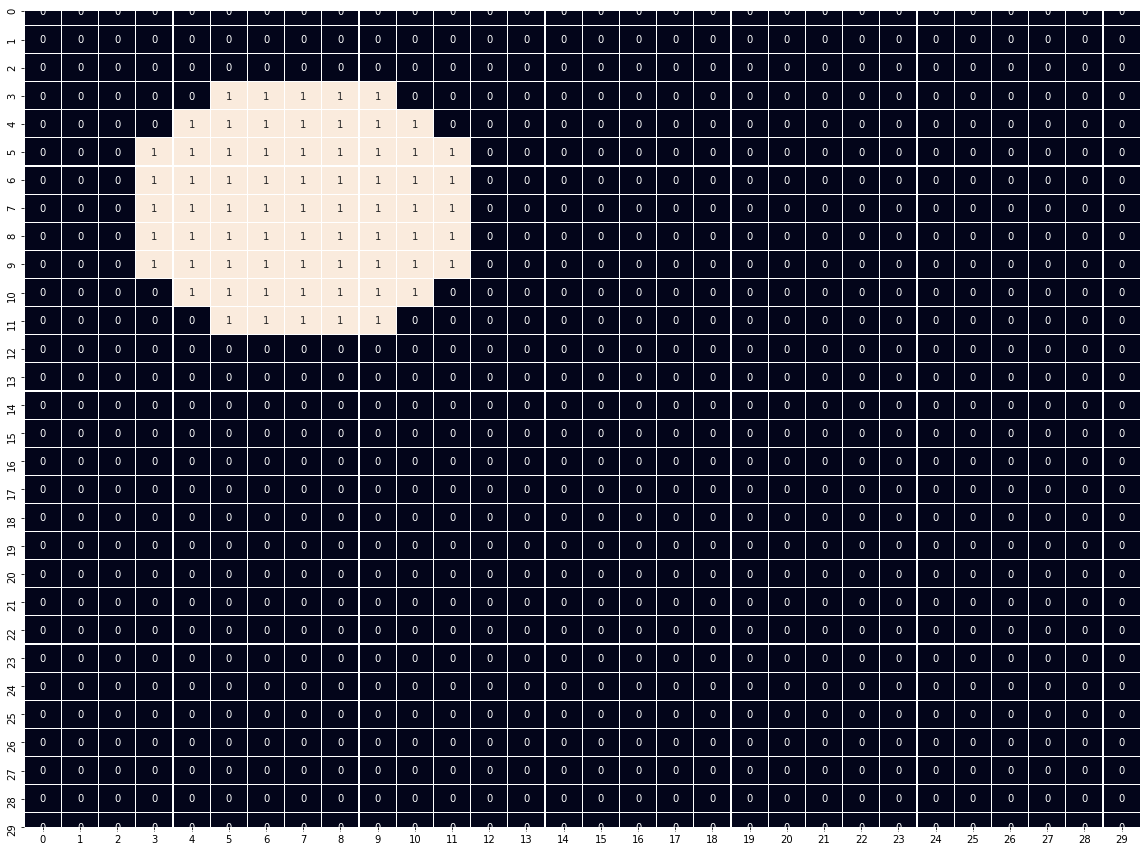

In [29]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(soln, linecolor = 'white', linewidths = 0.1, annot = True, ax = ax, cbar =False)